# Boosting

<img src="../Images/Machine_Learning/Boosting_Stacking_14.JPG" width="500" height="250" title=""/>

## [ Boosting ]

* Random Forest의 앙상블 기법에 해당하는 내용이므로 연관지어 보기

* Ensemble : 약한 분류기들을 결합하여 강한 분류기로 만드는 것
* 종류 : Bagging, Boosting, Stacking

### 1. Boosting 개념

* 약 분류기를 순차적으로 학습하는 앙상블 기법
* 예측을 반복하면서 잘못 예측한 데이터에 가중치를 부여해 오류를 개선

* Bagging : 무작위 복원 추출로 부트스트랩 샘플을 추출
* Boosting : 부트스트랩 샘플을 추출하는 과정에서 각 자료에 동일한 확률을 부여하는 것이 아니라 분류가 잘못된 데이터에 더 큰 가중을 주어 표본을 추출

### 2. Boosting 종류

* 종류 : AdaBoost, Gradient Boost, XGBoost

#### 2-1. AdaBoost

* Adaptive Boosting
* 간단한 약분류기들이 상호 보완하도록 순차적으로 학습
* 과소적합된 학습 데이터의 가중치를 높이면서 새로 학습된 모델이 학습하기 어려운 데이터에 잘 적합되도록 하는 방식
* AdaBoost에서의 약 분류기 : 변수 하나와 if 문 하나 정도의 depth(변수==A => T/F)
* `AdaBoost 학습 방법`
  * 전체 학습 데이터를 이용해 모델 생성
  * 잘못 예측된 데이터의 가중치를 상대적으로 높여줌
  * 가중치를 반영하여 다음 모델을 학습
  * <img src="../Images/Machine_Learning/Boosting_Stacking_1.JPG" width="600" height="300" title=""/>
  * <img src="../Images/Machine_Learning/Boosting_Stacking_2.JPG" width="600" height="300" title=""/>
* `AdaBoost 예측 방법`
  * 생성된 모델의 신뢰도가 각 모델에 적용되어 예측에 사용됨
  * <img src="../Images/Machine_Learning/Boosting_Stacking_3.JPG" width="600" height="300" title=""/>

#### 2-2. Gradient Boost

* 학습 전 단계 모델에서의 잔여오차(residual error)에 대해 새로운 모델을 학습
* 잔여 오차를 예측하여 발전하는 약분류기
* 현재까지 학습된 분류기의 약점을 Gradient를 통해 알려주고 이를 중점으로 보완하는 방식

* `Gradient Boost 학습 방법`
  * 모델을 학습한 후 예측값을 계산
  * 잔여 오차 계산
  * 잔여 오차를 예측하는 트리 모델 생성
  * Learning Rate를 이용해 기존 예측값을 수정
  * <img src="../Images/Machine_Learning/Boosting_Stacking_4.JPG" width="600" height="300" title=""/>
  * <img src="../Images/Machine_Learning/Boosting_Stacking_5.JPG" width="600" height="200" title=""/>
  * <img src="../Images/Machine_Learning/Boosting_Stacking_6.JPG" width="600" height="300" title=""/>

* `Gradient Boost 예측 방법`
  * <img src="../Images/Machine_Learning/Boosting_Stacking_7.JPG" width="600" height="300" title=""/>

#### 2-3. XGBoost

* Gradient Boosting 기반 모델
* 트리를 만들 때 병렬 처리를 가능하게 해서 Gradient Boosting의 속도 개선
* 특징
  * 병렬/분산 처리 가능
    * <img src="../Images/Machine_Learning/Boosting_Stacking_8.JPG" width="600" height="300" title=""/>
  * Split 지점을 고려할 때, 일부를 보고 결정
    * <img src="../Images/Machine_Learning/Boosting_Stacking_9.JPG" width="600" height="300" title=""/>
  * Sparsity Awareness : Zero 데이터를 건너뛰면서 학습, 범주형 변수를 dummy화 시킬 경우 학습 속도를 빠르게 할 수 있음

## [ Boosting 심화]

### 1. `LightGBM`

#### 1-1. LightGBM 개념

* Gradient Boosting 기반의 모델
* 약분류기의 학습이 수직적으로 확장하는 leaf-wise 알고리즘을 사용
* XGBoost보다 학습 속도가 빠르고 메모리 사용량도 상대적으로 적음

#### 1-2. Tree의 종류 : Full Tree / Tree Growth

* Full Tree
  * 모든 끝마디에서의 순도가 100%인 상태
* Tree Growth
  * Full Tree로 학습할 경우 두 방법 모두 최종 결과물은 같음
  * 보통 Full Tree만큼 학습시키지 않기 때문에 중간 결과물의 차이가 있음

#### 1-3. Tree Growth의 종류 : Level-Wise Growth / Leaf-Wise Growth

* Tree - Growth 종류(의사결정나무 만드는 방법)
  * Level-Wise Growth : 뿌리 노드와 가까운 노드부터 데이터를 분할하는 방법
    * 수평성장
    * RandomForest, XGBoost
    * <img src="../Images/Machine_Learning/Boosting_Stacking_10.JPG" width="500" height="250" title=""/>
  * Leaf-Wise Growth
    * Loss 변화가 가장 큰 노드부터 데이터를 분할하는 방법
    * 수직성장
    * LigthGBM
    * <img src="../Images/Machine_Learning/Boosting_Stacking_11.JPG" width="500" height="250" title=""/>

### 2. CatBoost

#### 2-1. CatBoost 개념

* Categorical Boosting
* `범주형 변수`를 처리하는데 중점을 둔 모델
* 기존 GBM 기반 모델들이 가지고 있는 범주형 변수 처리 문제를 해결

#### 2-2. 범주형 변수를 다루는 방법 : Ordered Boosting / Categorical Feature Combinations

* Ordered Boosting
  * 일부만 가지고 잔여 오차를 계산을 한 뒤 모델로 만듦
  * 모델이 생성된 뒤의 데이터의 잔여 오차는 최초로 생성된 모델로 예측한 값을 사용
  * <img src="../Images/Machine_Learning/Boosting_Stacking_12.JPG" width="500" height="250" title=""/>
  * 기존 모델과 차이
    * 기존의 Boosting 모델이 일괄적으로 모든 학습 데이터를 대상으로 잔여 오차를 계산
    * 즉, 새로운 트리를 만들 때에 현재 모델에서 쓰인 데이터의 Gradient를 다시 사용함 => 과대적합
    * Ordered Boosting을 사용하는 경우 Gradient가 계속 갱신되기 때문에 과대적합을 방지

*  Categorical Feature Combinations
  * Information gain이 동일한 두 변수를 하나의 변수로 묶는 방법
  * 데이터 전처리에 있어 변수 선택의 부담을 줄여줌
  * <img src="../Images/Machine_Learning/Boosting_Stacking_13.JPG" width="500" height="250" title=""/>

### 3. Stacking

#### 3-1. Stacking 개념

* Meta Modeling
* 다른 모델들의 단점은 극복하고 장점은 취할 수 있는 조합 방법을 찾는 방법

#### 3-2. Stacking 방법

* 1. 학습 데이터를 이용해 Sub Model들을 생성 => 서로 다른 모델
  * 주로 사용하는 Sub Model : SVM, RandomForest, KNN
  * <img src="../Images/Machine_Learning/Boosting_Stacking_15.JPG" width="500" height="250" title=""/>
* 2. Sub Model들의 예측값을 데이터로 Meta Model을 생성 => 주로 Regression 모델
  * <img src="../Images/Machine_Learning/Boosting_Stacking_16.JPG" width="500" height="250" title=""/>
* 3. Meta Model : Stacking Regression / Stacking Classification / Stacking Multi-class Classification
  * Stacking Regression
    * <img src="../Images/Machine_Learning/Boosting_Stacking_17.JPG" width="500" height="250" title=""/>
  * Stacking Classification : 주로 `확률`을 사용
    * <img src="../Images/Machine_Learning/Boosting_Stacking_18.JPG" width="500" height="250" title=""/>
  * Stacking Multi-class Classification : 예측값이 여러 개
    * <img src="../Images/Machine_Learning/Boosting_Stacking_19.JPG" width="500" height="250" title=""/>

---

## [ Boosting Regression ]

### 1. Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

In [2]:
data = np.linspace(0, 6, 150)[:, np.newaxis]

label = np.sin(data).ravel() + np.sin(6 * data).ravel()
noise = np.random.normal(data.shape[0]) * 0.01
label += noise

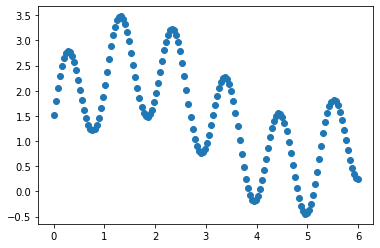

In [3]:
plt.scatter(data, label)

In [5]:
train_size = 125
train_data, test_data = data[:train_size], data[train_size:]
train_label, test_label = label[:train_size], label[train_size:]

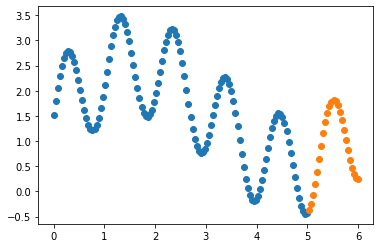

In [6]:
plt.scatter(train_data, train_label)
plt.scatter(test_data, test_label, color="C1")

### 2. Decision Tree

In [7]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=2)

In [8]:
tree.fit(train_data, train_label)

DecisionTreeRegressor(max_depth=2)

In [9]:
tree_train_pred = tree.predict(train_data)
tree_test_pred = tree.predict(test_data)

In [10]:
from sklearn.metrics import mean_squared_error

tree_train_mse = mean_squared_error(train_label, tree_train_pred)
tree_test_mse = mean_squared_error(test_label, tree_test_pred)

print(f"Tree mean squared error is {tree_train_mse:.4f}")
print(f"Tree mean squared error is {tree_test_mse:.4f}")

Tree mean squared error is 0.3669
Tree mean squared error is 1.8188


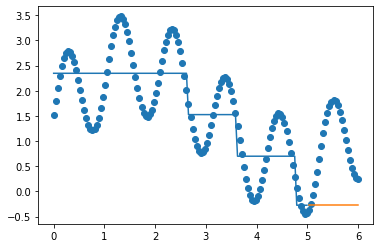

In [11]:
plt.scatter(data, label)
plt.plot(train_data, tree_train_pred)
plt.plot(test_data, tree_test_pred)

### 3. AdaBoost

* `sklearn.ensemble의 AdaBoostRegressor`
* `base_estimator`를 선언
  *  if else로 데이터가 분류 될 수 있도록 depth가 1인 tree로 base estimator로 만듦

In [13]:
from sklearn.ensemble import AdaBoostRegressor

ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1)) # base_estimator

ada_boost.fit(train_data, train_label)

ada_boost_train_pred = ada_boost.predict(train_data)
ada_boost_test_pred = ada_boost.predict(test_data)

ada_boost_train_mse = mean_squared_error(train_label, ada_boost_train_pred)
ada_boost_test_mse = mean_squared_error(test_label, ada_boost_test_pred)

print(f"Ada Boost Train mean squared error is {ada_boost_train_mse:.4f}")
print(f"Ada Boost Test mean squared error is {ada_boost_test_mse:.4f}")

Ada Boost Train mean squared error is 0.4615
Ada Boost Test mean squared error is 0.5289


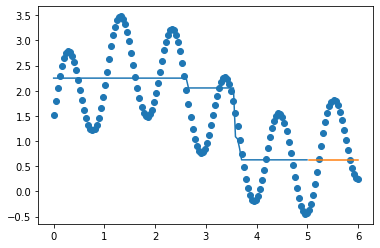

In [14]:
plt.scatter(data, label)
plt.plot(train_data, ada_boost_train_pred)
plt.plot(test_data, ada_boost_test_pred)

### 4. Gradient Boost

* `sklearn.ensemble 의 GradientBoostingRegressor`로 생성
* 간단한 if else로 만들 수 있도록 max_depth를 1로

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost = GradientBoostingRegressor(max_depth=1)

grad_boost.fit(train_data, train_label)

grad_boost_train_pred = grad_boost.predict(train_data)
grad_boost_test_pred = grad_boost.predict(test_data)

grad_boost_train_mse = mean_squared_error(train_label, grad_boost_train_pred)
grad_boost_test_mse = mean_squared_error(test_label, grad_boost_test_pred)

print(f"Gradient Boost Train mean squared error is {grad_boost_train_mse:.4f}")
print(f"Gradient Boost Test mean squared error is {grad_boost_test_mse:.4f}")

Gradient Boost Train mean squared error is 0.2767
Gradient Boost Test mean squared error is 1.3215


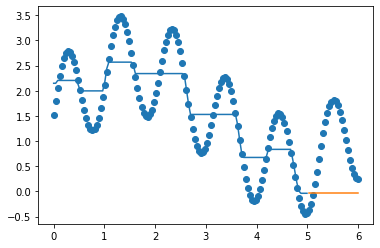

In [16]:
plt.scatter(data, label)
plt.plot(train_data, grad_boost_train_pred)
plt.plot(test_data, grad_boost_test_pred)

* AdaBoosting이 세개 중에서 그나마 잘 맞춤

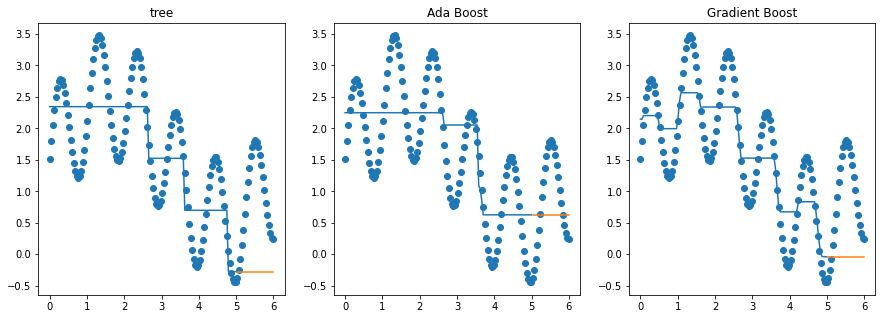

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
preds = [
    ("tree", tree_train_pred, tree_test_pred),
    ("Ada Boost", ada_boost_train_pred, ada_boost_test_pred),
    ("Gradient Boost", grad_boost_train_pred, grad_boost_test_pred)
]
for idx, (name, train_pred, test_pred) in enumerate(preds):
    ax = axes[idx]
    ax.scatter(data, label)
    ax.plot(train_data, train_pred)
    ax.plot(test_data, test_pred)
    ax.set_title(name)

In [18]:
print(f"Tree train mean squared error is {tree_train_mse:.4f}")
print(f"Ada Boost train mean squared error is {ada_boost_train_mse:.4f}")
print(f"Gradient Boost train mean squared error is {grad_boost_train_mse:.4f}")

print(f"Tree test mean squared error is {tree_test_mse:.4f}")
print(f"Ada Boost test mean squared error is {ada_boost_test_mse:.4f}")
print(f"Gradient Boost test mean squared error is {grad_boost_test_mse:.4f}")

Tree train mean squared error is 0.3669
Ada Boost train mean squared error is 0.4615
Gradient Boost train mean squared error is 0.2767
Tree test mean squared error is 1.8188
Ada Boost test mean squared error is 0.5289
Gradient Boost test mean squared error is 1.3215


---

## [ Boosting Regression 심화 : 부동산 가격예측]

### 1. Data

#### 1-1. Data Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

In [3]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [4]:
data, target = housing["data"], housing["target"]

In [5]:
pd.DataFrame(data, columns=housing["feature_names"]).describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [6]:
pd.Series(target).describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
dtype: float64

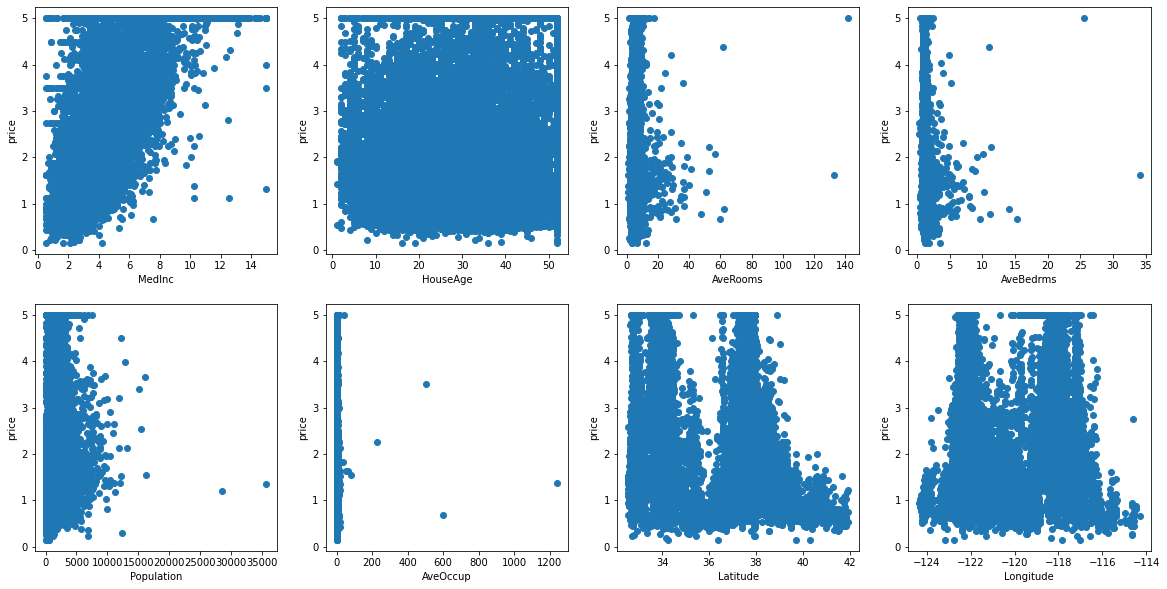

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
for i, feature_name in enumerate(housing["feature_names"]):
    ax = axes[i // 4, i % 4]
    ax.scatter(data[:, i], target)
    ax.set_xlabel(feature_name)
    ax.set_ylabel("price")

#### 1-2. Data Split

In [8]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021
)

### 2. XGBoost

* 학습/예측

In [11]:
# pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\jack0\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [12]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor()

xgb_reg.fit(train_data, train_target)

xgb_train_pred = xgb_reg.predict(train_data)
xgb_test_pred = xgb_reg.predict(test_data)

* 실제값과 예측값 비교

Text(0, 0.5, 'target')

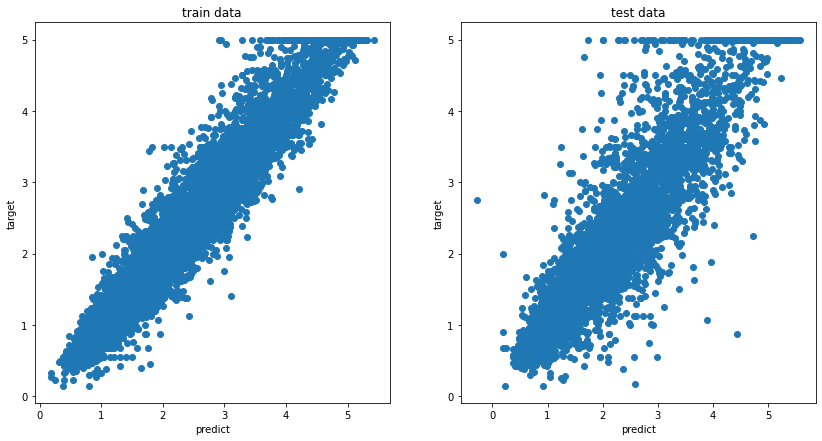

In [13]:
plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.scatter(xgb_train_pred, train_target)
plt.title("train data")
plt.xlabel("predict")
plt.ylabel("target")

plt.subplot(122)
plt.scatter(xgb_test_pred, test_target)
plt.title("test data")
plt.xlabel("predict")
plt.ylabel("target")

* 평가

In [14]:
from sklearn.metrics import mean_squared_error

xgb_train_mse = mean_squared_error(train_target, xgb_train_pred)
xgb_test_mse = mean_squared_error(test_target, xgb_test_pred)

print(f"XGBoost Train MSE is {xgb_train_mse:.4f}")
print(f"XGBoost Test MSE is {xgb_test_mse:.4f}")

XGBoost Train MSE is 0.0697
XGBoost Test MSE is 0.2209


### 3. Light GBM

In [15]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\jack0\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [17]:
import lightgbm as lgb

lgb_reg = lgb.LGBMRegressor()

lgb_reg.fit(train_data, train_target)

lgb_train_pred = lgb_reg.predict(train_data)
lgb_test_pred = lgb_reg.predict(test_data)

lgb_train_mse = mean_squared_error(train_target, lgb_train_pred)
lgb_test_mse = mean_squared_error(test_target, lgb_test_pred)

print(f"Light Boost Train MSE is {lgb_train_mse:.4f}")
print(f"Light Boost Test MSE is {lgb_test_mse:.4f}")

Light Boost Train MSE is 0.1543
Light Boost Test MSE is 0.2098


Text(0, 0.5, 'target')

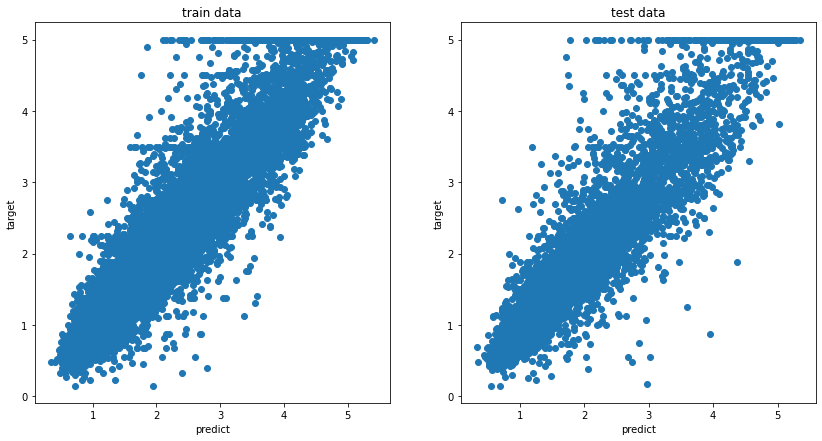

In [18]:
plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.scatter(lgb_train_pred, train_target)
plt.title("train data")
plt.xlabel("predict")
plt.ylabel("target")

plt.subplot(122)
plt.scatter(lgb_test_pred, test_target)
plt.title("test data")
plt.xlabel("predict")
plt.ylabel("target")

### 4. CatBoost

In [22]:
# pip install catboost

In [21]:
pd.DataFrame(data, columns=housing["feature_names"]).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [23]:
import catboost as cb

cb_reg = cb.CatBoostRegressor()

cb_reg.fit(train_data, train_target, verbose=False) # 결과물에 대한 설명 제거 : verbose=False

cb_train_pred = cb_reg.predict(train_data)
cb_test_pred = cb_reg.predict(test_data)

cb_train_mse = mean_squared_error(train_target, cb_train_pred)
cb_test_mse = mean_squared_error(test_target, cb_test_pred)

print(f"Cat Boost Train MSE is {cb_train_mse:.4f}")
print(f"Cat Boost Test MSE is {cb_test_mse:.4f}")

Cat Boost Train MSE is 0.1163
Cat Boost Test MSE is 0.1938


Text(0, 0.5, 'target')

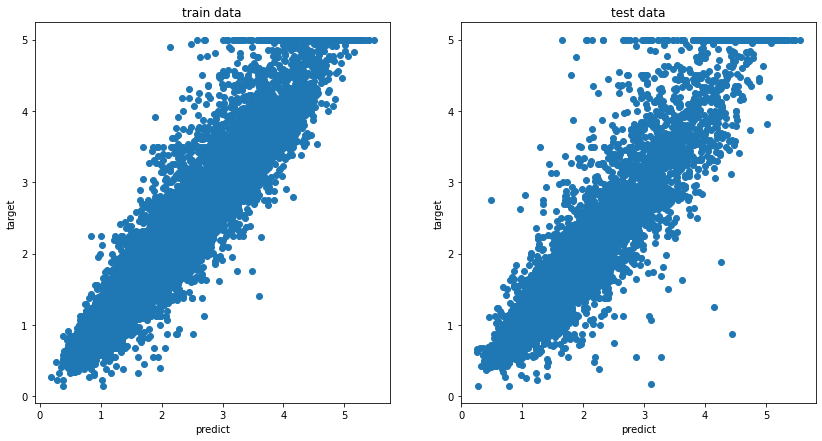

In [24]:
plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.scatter(cb_train_pred, train_target)
plt.title("train data")
plt.xlabel("predict")
plt.ylabel("target")

plt.subplot(122)
plt.scatter(cb_test_pred, test_target)
plt.title("test data")
plt.xlabel("predict")
plt.ylabel("target")

In [25]:
print(f"XGBoost Test MSE is {xgb_test_mse:.4f}")
print(f"Light Boost Test MSE is {lgb_test_mse:.4f}")
print(f"Cat Boost Test MSE is {cb_test_mse:.4f}")

XGBoost Test MSE is 0.2209
Light Boost Test MSE is 0.2098
Cat Boost Test MSE is 0.1938


---

## [ Boosting Classification ]

### 1. Data

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

In [20]:
from sklearn.datasets import make_gaussian_quantiles

data_1, label_1 = make_gaussian_quantiles(
    cov=2, n_samples=200, n_features=2, n_classes=2, random_state=2021
)
data_2, label_2 = make_gaussian_quantiles(
    mean=(3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=2021
)

In [21]:
data = np.concatenate((data_1, data_2))
label = np.concatenate((label_1, - label_2 + 1))

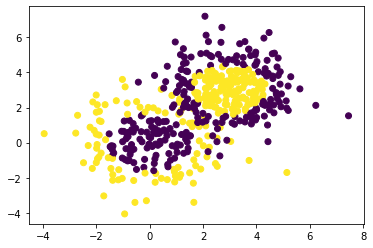

In [22]:
plt.scatter(data[:,0], data[:,1], c=label)

In [23]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(
    data, label, train_size=0.7, random_state=2021
)

In [24]:
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

### 2. Decision Tree

* 학습/예측/평가

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(max_depth=2)

tree.fit(train_data, train_label)

tree_train_pred = tree.predict(train_data)
tree_test_pred = tree.predict(test_data)

tree_train_acc = accuracy_score(train_label, tree_train_pred)
tree_test_acc = accuracy_score(test_label, tree_test_pred)

print(f"Tree train accuray is {tree_train_acc:.4f}")
print(f"Tree test accuray is {tree_test_acc:.4f}")   

Tree train accuray is 0.7286
Tree test accuray is 0.6867


* 시각화

In [26]:
tree_Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
tree_Z = tree_Z.reshape(xx.shape)

* 그렇게 잘 맞추지 못함

Text(0.5, 1.0, 'test data')

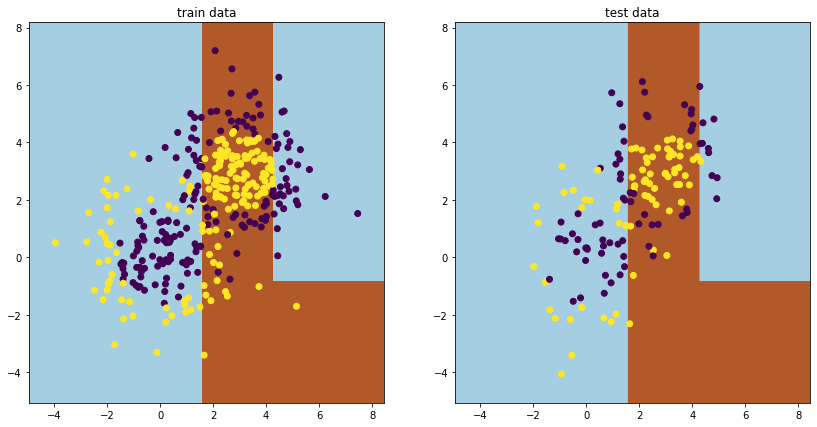

In [27]:
plt.figure(figsize=(14, 7))
plt.subplot(121)
cs = plt.contourf(xx, yy, tree_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:,0], train_data[:,1], c=train_label)
plt.title("train data")

plt.subplot(122)
cs = plt.contourf(xx, yy, tree_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:,0], test_data[:,1], c=test_label)
plt.title("test data")

### 3. AdaBoost

* `sklearn.ensemble의 AdaBoostClassifier`
* `base_estimator`를 선언
  * 가장 간단한 if else로 데이터가 분류 될 수 있도록 depth가 1인 tree로

In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))

ada_boost.fit(train_data, train_label)

ada_boost_train_pred = ada_boost.predict(train_data)
ada_boost_test_pred = ada_boost.predict(test_data)

ada_boost_train_acc = accuracy_score(train_label, ada_boost_train_pred)
ada_boost_test_acc = accuracy_score(test_label, ada_boost_test_pred)

print(f"Ada Boost train accuray is {ada_boost_train_acc:.4f}")
print(f"Ada Boost test accuray is {ada_boost_test_acc:.4f}")   

Ada Boost train accuray is 0.9486
Ada Boost test accuray is 0.8600


* 시각화

In [31]:
ada_boost_Z = ada_boost.predict(np.c_[xx.ravel(), yy.ravel()])
ada_boost_Z = ada_boost_Z.reshape(xx.shape)

* Decision Tree보다 잘 맞춤

Text(0.5, 1.0, 'test_data')

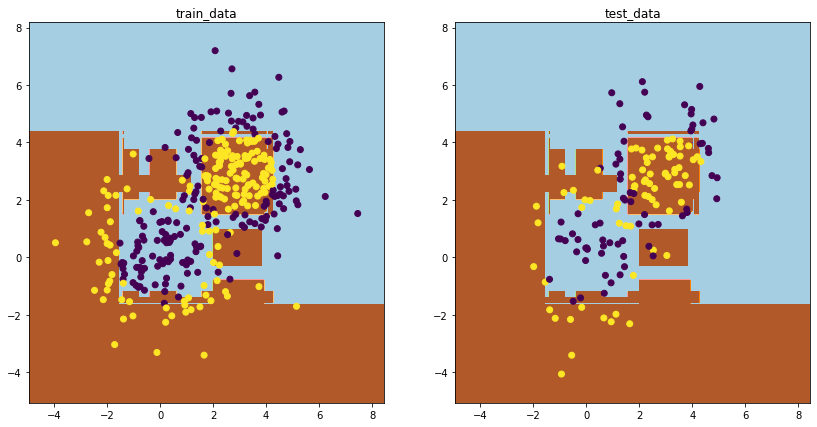

In [32]:
plt.figure(figsize=(14, 7))

plt.subplot(121)
cs = plt.contourf(xx, yy, ada_boost_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:,0], train_data[:,1], c=train_label)
plt.title("train_data")

plt.subplot(122)
cs = plt.contourf(xx, yy, ada_boost_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:,0], test_data[:,1], c=test_label)
plt.title("test_data")

### 4. Gradient Boost

* `sklearn.ensemble 의 GradientBoostingClassifier`
* 간단한 if else로 만들 수 있도록 max_depth를 1

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

grad_boost = GradientBoostingClassifier(max_depth=1)

grad_boost.fit(train_data, train_label)

grad_boost_train_pred = grad_boost.predict(train_data)
grad_boost_test_pred = grad_boost.predict(test_data)

grad_boost_train_acc = accuracy_score(train_label, grad_boost_train_pred)
grad_boost_test_acc = accuracy_score(test_label, grad_boost_test_pred)

print(f"Gradient Boost train accuray is {grad_boost_train_acc:.4f}")
print(f"Gradient Boost test accuray is {grad_boost_test_acc:.4f}")   

Gradient Boost train accuray is 0.8886
Gradient Boost test accuray is 0.8200


In [34]:
grad_boost_Z = grad_boost.predict(np.c_[xx.ravel(), yy.ravel()])
grad_boost_Z = grad_boost_Z.reshape(xx.shape)

* 정확도 수치는 AdaBoost보다 낮음

Text(0.5, 1.0, 'test_data')

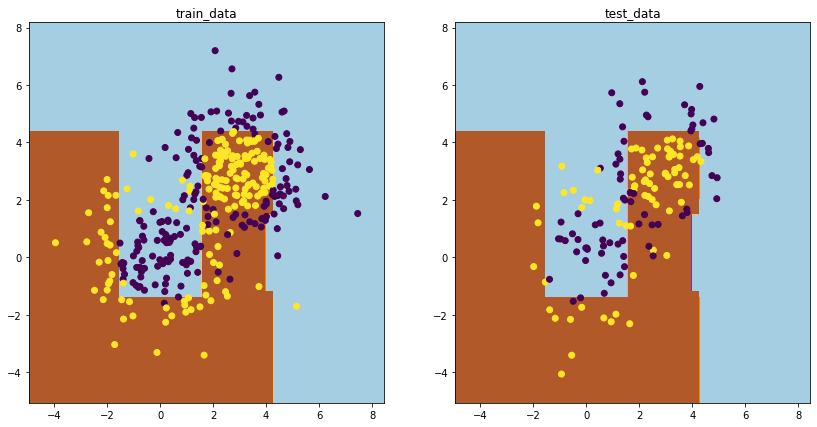

In [35]:
plt.figure(figsize=(14, 7))

plt.subplot(121)
cs = plt.contourf(xx, yy, grad_boost_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:,0], train_data[:,1], c=train_label)
plt.title("train_data")

plt.subplot(122)
cs = plt.contourf(xx, yy, grad_boost_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:,0], test_data[:,1], c=test_label)
plt.title("test_data")

### 5. 종합

* Ada Boost가 Test에 가장 적합한 모델

In [36]:
print(f"Tree test accuray is {tree_test_acc:.4f}")
print(f"Gradient Boost test accuray is {grad_boost_test_acc:.4f}")
print(f"Ada Boost test accuray is {ada_boost_test_acc:.4f}")

Tree test accuray is 0.6867
Gradient Boost test accuray is 0.8200
Ada Boost test accuray is 0.8600


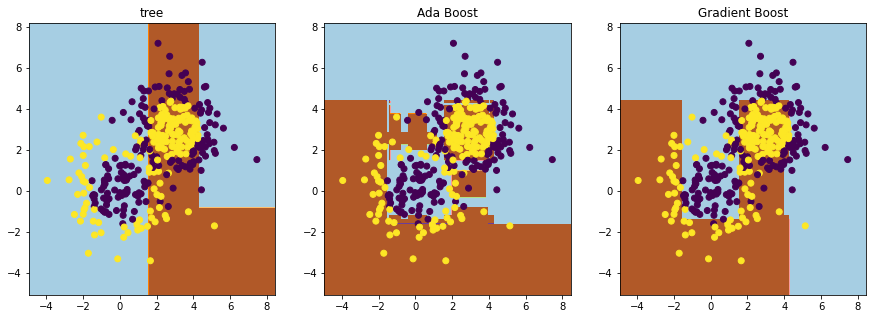

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
Z_name = [
    ("tree", tree_Z),
    ("Ada Boost", ada_boost_Z),
    ("Gradient Boost", grad_boost_Z)
]
for idx, (name, Z) in enumerate(Z_name):
    ax = axes[idx]
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    ax.scatter(train_data[:,0], train_data[:,1], c=train_label)
    ax.set_title(name)

---

## [ Boosting Classification 심화 : 뉴스 분류하기 ]

### 1. Data

#### 1-1. Data Load

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

In [71]:
from sklearn.datasets import fetch_20newsgroups

newsgroup = fetch_20newsgroups()

In [72]:
data, target = newsgroup["data"], newsgroup["target"]

In [73]:
print(data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [74]:
target[0]

7

In [75]:
newsgroup["target_names"]

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

#### 1-2. Data Selection : df.query

In [76]:
len(newsgroup["target_names"])

20

In [77]:
text = pd.Series(data, name="text")
target = pd.Series(target, name="target")

In [78]:
df = pd.concat([text, target], 1)
df

C:\Users\jack0\AppData\Local\Temp/ipykernel_81416/3328291779.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df = pd.concat([text, target], 1)


,text,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14
...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,4
11311,From: westes@netcom.com (Will Estes)\nSubject:...,3
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1


In [79]:
df.target.value_counts().sort_index()

0     480
1     584
2     591
3     590
4     578
5     593
6     585
7     594
8     598
9     597
10    600
11    595
12    591
13    594
14    593
15    599
16    546
17    564
18    465
19    377
Name: target, dtype: int64

* 4개의 뉴스 그룹만 사용(16~19)
  * 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc

In [80]:
df.query("16 <= target <= 19") # 조건에 해당하는 데이터 추출

,text,target
5,From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\...,16
11,From: david@terminus.ericsson.se (David Bold)\...,19
33,From: ayr1@cunixa.cc.columbia.edu (Amir Y Rose...,17
34,From: joec@hilbert.cyprs.rain.com ( Joe Cipale...,18
39,From: bressler@iftccu.ca.boeing.com (Rick Bres...,16
...,...,...
11277,From: bob1@cos.com (Bob Blackshaw)\nSubject: R...,17
11280,From: jake@bony1.bony.com (Jake Livni)\nSubjec...,17
11299,From: 2120788@hydra.maths.unsw.EDU.AU ()\nSubj...,17
11304,From: Pegasus@aaa.uoregon.edu (Pegasus)\nSubje...,19


In [81]:
df_sample = df.query("16 <= target <= 19")
data = df_sample.text
target = df_sample.target

In [82]:
np.array(data).shape

(1952,)

#### 1-3. Data Split

In [83]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021
)

### 2. CountVectorize

* 자연어 그대로 모델 학습이 불가능하므로 문자열을 숫자로 변환

In [84]:
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jack0\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

* 뉴스에 모두 등장한 단어 사용

In [85]:
cnt_vectorizer = CountVectorizer(tokenizer=word_tokenize)
cnt_vectorizer.fit(train_data)

c:\Users\jack0\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(tokenizer=<function word_tokenize at 0x0000024EEB055670>)

In [86]:
len(cnt_vectorizer.vocabulary_)

32020

* 최소 10개의 뉴스에서 등장한 단어

In [87]:
cnt_vectorizer = CountVectorizer(tokenizer=word_tokenize, min_df=10)
cnt_vectorizer.fit(train_data)

CountVectorizer(min_df=10,
                tokenizer=<function word_tokenize at 0x0000024EEB055670>)

In [88]:
len(cnt_vectorizer.vocabulary_)

4244

In [89]:
train_matrix = cnt_vectorizer.transform(train_data)
test_matrix = cnt_vectorizer.transform(test_data)

### 3. XGBoost

* 현재 target 값은 [16,17,18,19]
* 그대로 적용하면 XGBoost에서 y값이 [0,1,2,3]이 아니라는 오류 발생 => LabelEncoder 적용

In [90]:
train_target_xgb = train_target.copy()
test_target_xgb = test_target.copy()

In [91]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_target_xgb = le.fit_transform(train_target_xgb)
test_target_xgb = le.fit_transform(test_target_xgb)

In [92]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_clf = xgb.XGBClassifier()

xgb_clf.fit(train_matrix, train_target_xgb)

xgb_train_pred = xgb_clf.predict(train_matrix)
xgb_test_pred = xgb_clf.predict(test_matrix)

xgb_train_acc = accuracy_score(train_target_xgb, xgb_train_pred)
xgb_test_acc = accuracy_score(test_target_xgb, xgb_test_pred)

print(f"XGBoost Train accuracy is {xgb_train_acc:.4f}")
print(f"XGBoost Test accuracy is {xgb_test_acc:.4f}")

XGBoost Train accuracy is 1.0000
XGBoost Test accuracy is 0.9232


### 4. Light BGM

In [93]:
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier()

* LGB는 array형태로 변환해 주어야 함

In [101]:
train_matrix # sparse matrix

<1366x4244 sparse matrix of type '<class 'numpy.int64'>'
	with 237316 stored elements in Compressed Sparse Row format>

In [100]:
train_matrix.toarray()

(1366, 4244)

In [95]:
lgb_clf.fit(train_matrix.toarray(), train_target)

lgb_train_pred = lgb_clf.predict(train_matrix.toarray())
lgb_test_pred = lgb_clf.predict(test_matrix.toarray())

lgb_train_acc = accuracy_score(train_target, lgb_train_pred)
lgb_test_acc = accuracy_score(test_target, lgb_test_pred)

print(f"Light Boost train accuracy is {lgb_train_acc:.4f}")
print(f"Light Boost test accuracy is {lgb_test_acc:.4f}")

Light Boost train accuracy is 1.0000
Light Boost test accuracy is 0.9249


### 5. CatBoost

In [96]:
import catboost as cb

cb_clf = cb.CatBoostClassifier()

cb_clf.fit(train_matrix, train_target, verbose=False)

cb_train_pred = cb_clf.predict(train_matrix)
cb_test_pred = cb_clf.predict(test_matrix)

cb_train_acc = accuracy_score(train_target, cb_train_pred)
cb_test_acc = accuracy_score(test_target, cb_test_pred)

print(f"Cat Boost train accuracy is {cb_train_acc:.4f}")
print(f"Cat Boost test accuracy is {cb_test_acc:.4f}")

Cat Boost train accuracy is 1.0000
Cat Boost test accuracy is 0.9386


* Cat Boost가 가장 좋은 성능을 보임

In [97]:
print(f"XGBoost test accuray is {xgb_test_acc:.4f}")
print(f"Light Boost test accuray is {lgb_test_acc:.4f}")
print(f"Cat Boost test accuray is {cb_test_acc:.4f}")

XGBoost test accuray is 0.9232
Light Boost test accuray is 0.9249
Cat Boost test accuray is 0.9386


---

## [ Stacking Regression ]

### 1. Data

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

In [103]:
from sklearn.datasets import make_regression

data, label = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1) # n_informative=15 : 15개의 변수만 의미있음

data.shape, label.shape

((1000, 20), (1000,))

In [108]:
label

array([ 4.19492854e+02,  5.24804188e+02,  5.18759355e+01, -3.69628598e+01,
       -2.18301260e+02,  6.39581409e+00,  1.90888509e+02,  2.16430909e+02,
        1.33824096e+02, -1.00539492e+01,  1.60452950e+02,  2.34244294e+02,
        8.63397268e+01, -3.42741739e+02,  2.63302692e+02, -9.78353864e+01,
        9.87824219e+01, -5.54869405e+01,  2.72586036e+02, -2.90483585e+02,
       -2.76630921e+02, -3.08879971e+02, -7.75468744e+01, -4.90112211e+02,
        1.74278231e+02, -4.51173610e+02,  2.96228732e+02,  3.00016239e+01,
        6.76020419e+01, -1.71509264e+02,  3.28614495e+02,  3.21708828e+02,
       -2.17500503e+02,  2.68844454e+02,  1.41575924e+02,  1.71226762e+02,
       -2.18569214e+02, -2.11697457e+02, -9.46376755e+01,  1.77642775e+02,
        6.40408157e+01,  1.00349388e+02, -7.36103443e+02, -7.73627864e+01,
        2.55883853e+02,  2.48245803e+02, -7.54267494e+01, -1.05411554e+01,
       -1.49618577e+02,  1.01859839e+01,  1.85905097e+02, -4.58100961e+01,
        9.71448790e+01, -

In [105]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

pca_data = pca.fit_transform(data)

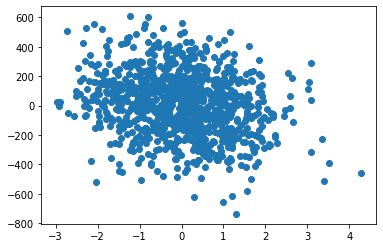

In [106]:
plt.scatter(pca_data, label)

In [107]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(
    data, label, train_size=0.7, random_state=2021
)

### 2. 모델의 성능

* KNeighborsRegressor, DecisionTreeRegressor, SVM

In [109]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

models = {
    'knn': KNeighborsRegressor(),
    'tree': DecisionTreeRegressor(),
    'svm': SVR(),
}

In [110]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [111]:
names = []
results = []
for name, model in models.items():
    result = cross_val_score(model, train_data, train_label, cv=3, scoring="neg_mean_absolute_error")
    names += [name]
    results += [result]

In [112]:
names, results

(['knn', 'tree', 'svm'],
 [array([-105.03162689, -105.83152462, -102.13684464]),
  array([-172.57596091, -157.40517646, -154.44920959]),
  array([-169.94710581, -171.22395842, -162.4710332 ])])

* 사용 가능한 scoring
  * scoring="neg_mean_absolute_error"

In [113]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

* scoring="neg_mean_absolute_error"이므로 작은 것이 가장 좋음
  * KNN이 가장 좋음

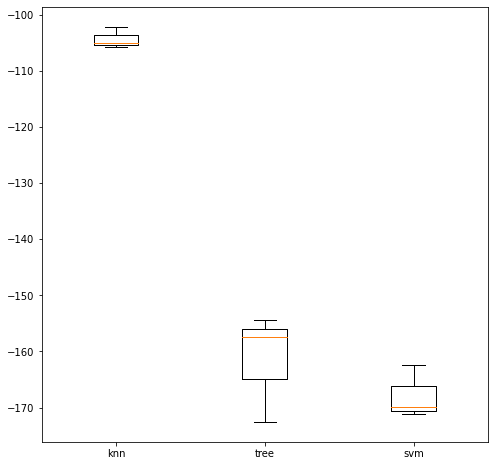

In [114]:
plt.figure(figsize=(8, 8))
plt.boxplot(results, labels=names)
plt.show()

In [115]:
for name, model in models.items():
    model.fit(train_data, train_label)
    test_pred = model.predict(test_data)
    acc = mean_absolute_error(test_label, test_pred)
    print(f"Model {name} test mean absoulte erorr is {acc:.4}")

Model knn test mean absoulte erorr is 97.77
Model tree test mean absoulte erorr is 163.4
Model svm test mean absoulte erorr is 162.6


### 3. Stacking

* estimators : Stacking에 사용할 모델
* final_estimator : Meta Model => Regressor를 사용

In [116]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

stacking = StackingRegressor(
    estimators=list(models.items()),
    final_estimator=LinearRegression(),
    cv=3
)

In [117]:
stacking_result = cross_val_score(stacking, train_data, train_label, cv=3, scoring="neg_mean_absolute_error")

In [118]:
stacking_result

array([-95.75491002, -83.88903129, -92.27779384])

In [119]:
all_result = []
all_result.extend(results)
all_result.append(stacking_result)

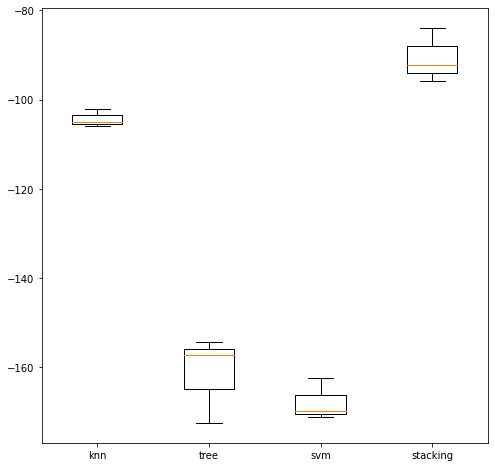

In [120]:
plt.figure(figsize=(8, 8))
plt.boxplot(all_result, labels=names + ["stacking"])
plt.show()

* Stacking 모델이 가장 좋은 성능

In [121]:
for name, model in models.items():
    test_pred = model.predict(test_data)
    acc = mean_absolute_error(test_label, test_pred)
    print(f"Model {name} test mean absoulte erorr is {acc:.4}")

stacking.fit(train_data, train_label)
stacking_pred = stacking.predict(test_data)
stacking_mae = mean_absolute_error(test_label, stacking_pred)
print(f"Model stacking mean absoulte erorr is {stacking_mae:.4}")

Model knn test mean absoulte erorr is 97.77
Model tree test mean absoulte erorr is 163.4
Model svm test mean absoulte erorr is 162.6
Model stacking mean absoulte erorr is 82.7


---

## [ Stacking Classification ]

### 1. Data

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

In [123]:
from sklearn.datasets import make_classification


data, label = make_classification(
    n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2021
)

In [124]:
data.shape, label.shape

((1000, 20), (1000,))

In [132]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_data = pca.fit_transform(data)

In [133]:
pca_data

array([[ -7.65510944,  -2.917144  ],
       [  9.59869511,   2.18565041],
       [  5.25866629, -11.08066459],
       ...,
       [ 10.14537468,  -7.68953462],
       [ -4.03939072,  -8.67508995],
       [-12.84579105,   5.98021134]])

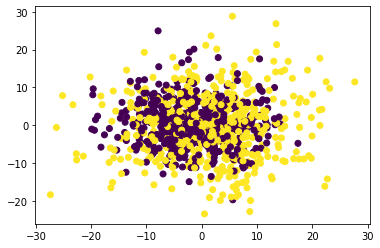

In [127]:
plt.scatter(pca_data[:,0], pca_data[:,1], c=label)

In [134]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(
    data, label, train_size=0.7, random_state=2021
)

### 2. 개별 모델 성능

* LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, SVC, GaussianNB

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [137]:
models = {
    'lr': LogisticRegression(),
    'knn': KNeighborsClassifier(),
    'tree': DecisionTreeClassifier(),
    'svm': SVC(),
    'bayes': GaussianNB(),
}

In [138]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [139]:
names = []
results = []
for name, model in models.items():
    result = cross_val_score(model, train_data, train_label, cv=3, scoring="accuracy")
    names += [name]
    results += [result]

In [140]:
results

[array([0.79487179, 0.74678112, 0.81545064]),
 array([0.88888889, 0.90128755, 0.86266094]),
 array([0.75213675, 0.75536481, 0.78111588]),
 array([0.91025641, 0.89270386, 0.9055794 ]),
 array([0.75213675, 0.76824034, 0.77253219])]

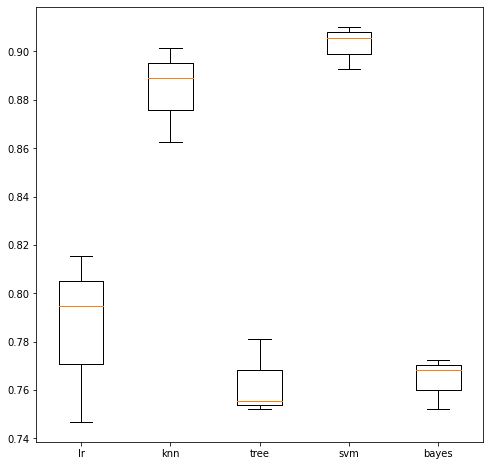

In [141]:
plt.figure(figsize=(8, 8))
plt.boxplot(results, labels=names)
plt.show()

In [142]:
for name, model in models.items():
    model.fit(train_data, train_label)
    test_pred = model.predict(test_data)
    acc = accuracy_score(test_label, test_pred)
    print(f"Model {name} test accuracy is {acc:.4}")

Model lr test accuracy is 0.7833
Model knn test accuracy is 0.8633
Model tree test accuracy is 0.7567
Model svm test accuracy is 0.9167
Model bayes test accuracy is 0.78


### 3. Stacking

In [143]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [144]:
models = {
    'lr': LogisticRegression(),
    'knn': KNeighborsClassifier(),
    'tree': DecisionTreeClassifier(),
    'svm': SVC(),
    'bayes': GaussianNB(),
}

In [148]:
list(models.items())

[('lr', LogisticRegression()),
 ('knn', KNeighborsClassifier()),
 ('tree', DecisionTreeClassifier()),
 ('svm', SVC()),
 ('bayes', GaussianNB())]

In [149]:
models.keys()

dict_keys(['lr', 'knn', 'tree', 'svm', 'bayes'])

In [150]:
stacking = StackingClassifier(
    estimators=list(models.items()),
    final_estimator=LogisticRegression(),
    cv=3
)

In [151]:
stacking_result = cross_val_score(stacking, train_data, train_label, cv=3, scoring="accuracy")
stacking_result

array([0.91025641, 0.91416309, 0.88841202])

* 모든 모델 성능 비교

In [152]:
all_result = []
all_result.extend(results)
all_result.append(stacking_result)

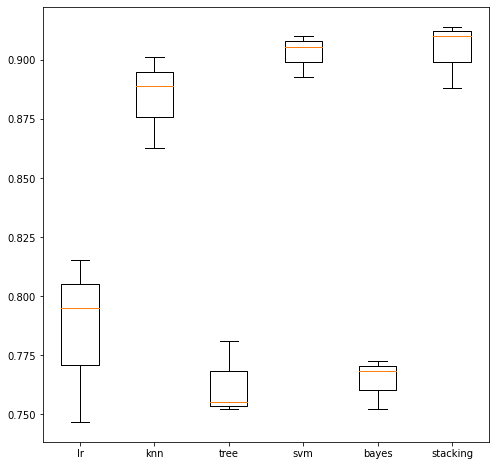

In [153]:
plt.figure(figsize=(8, 8))
plt.boxplot(all_result, labels=names + ["stacking"])
plt.show()

In [158]:
for name, model in models.items():
    model.fit(train_data, train_label)
    test_pred = model.predict(test_data)
    acc = accuracy_score(test_label, test_pred)
    print(f"Model {name} test accuracy is {acc:.4}")

stacking.fit(train_data, train_label)
stacking_pred = stacking.predict(test_data)
stacking_acc = accuracy_score(test_label, stacking_pred)
print(f"Model stacking test accuracy is {stacking_acc:.4}")

Model lr test accuracy is 0.7833
Model knn test accuracy is 0.8633
Model tree test accuracy is 0.7767
Model svm test accuracy is 0.9167
Model bayes test accuracy is 0.78
Model stacking test accuracy is 0.9233


Model stacking test accuracy is 0.9233
